In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sammyeyong/Documents/Data Analysis Projects/campagnes marketing/digital_marketing_campaign_dataset.csv') 
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [3]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(df)


Shape of DataFrame:  (8000, 20)

Columns in DataFrame:  ['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion']

Data types of columns:
 CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion      

In [4]:
# Dropping the 'AdvertisingPlatform' & 'AdvertisingTool' columns.
df=df.drop(['AdvertisingPlatform', 'AdvertisingTool'], axis=1)

In [5]:
''' 
Conversion rate (percentage of users who converted (made a purchase) 
divided by the total number of users.) 
'''
conversion_rate = df['Conversion'].sum() / len(df) * 100 
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.65%


In [6]:
''' 
Calculate the Cost per Acquisition (CPA) by dividing the total 
campaign cost by the number of acquired customers. 
''' 
total_cost = df['AdSpend'].sum() 
total_customers = len(df[df['Conversion']==1]) 
cpa = total_cost / total_customers 
print(f"Cost per Acquisition (CPA) : ${cpa:.2f}") 
print(f"${total_cost:.2f}")

Cost per Acquisition (CPA) : $5705.58
$40007558.64


In [7]:
''' 
Calculate the ROI by comparing the 
revenue generated (e.g., from conversions) to the campaign cost.
Calculate the average revenue generated per conversion. 
''' 

' \nCalculate the ROI by comparing the \nrevenue generated (e.g., from conversions) to the campaign cost.\nCalculate the average revenue generated per conversion. \n'

In [8]:
total_revenue = 40007558.64
total_conversions = len(df[df['Conversion']==1]) 
avg_revenue_per_conversion = total_revenue / total_conversions 
roi_alternative = (avg_revenue_per_conversion - total_cost) / total_cost * 100 
print(f"Alternative ROI (Avg. Revenue per Conversion): {roi_alternative:.2f}%")

Alternative ROI (Avg. Revenue per Conversion): -99.99%


In [ ]:
''' 
A negative ROI (Avg. Revenue per Conversion) of -100.00% indicates that the 
marketing campaign is generating a significant loss. This means that, on average, 
the cost of acquiring a conversion is greater than the revenue generated from that conversion. 
In other words, for every dollar spent on marketing, the campaign is losing $1. 
''' 

' \nA negative ROI (Avg. Revenue per Conversion) of -100.00% indicates that the \nmarketing campaign is generating a significant loss. This means that, on average, \nthe cost of acquiring a conversion is greater than the revenue generated from that conversion. \nIn other words, for every dollar spent on marketing, the campaign is losing $1. \n'

In [10]:
# Calculate the Click-Through Rate as the percentage of clicks relative to views. 

In [11]:
ctr = (df['ClickThroughRate'].sum() / len(df)) * 100 
print(f"Click through rate: {ctr:.2f}%")

Click through rate: 15.48%


In [12]:
# Calculate the bounce rate as the percentage of single-page visits. 
single_page_visits = len(df[df['PagesPerVisit']==1]) 
total_visits = len(df) 
bounce_rate = (single_page_visits / total_visits) * 100 
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.00%


In [13]:
# Calculate the average transaction value (average purchase amount) based on available data. 
avg_transaction_value = df.groupby('CustomerID')['AdSpend'].sum().mean() 
clv_alternative = avg_transaction_value 
print(f"Alternative Estimated CLV (Avg. Transaction Value): ${clv_alternative:.2f}")

Alternative Estimated CLV (Avg. Transaction Value): $5000.94


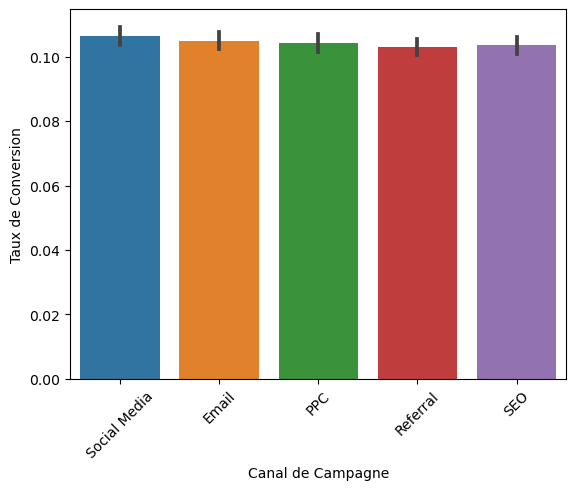

In [14]:
# Visualize how conversion rates vary across different campaign channels. 
sns.barplot(x='CampaignChannel', y='ConversionRate', data=df) 
plt.xlabel("Canal de Campagne") 
plt.ylabel("Taux de Conversion") 
plt.xticks(rotation=45) 
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


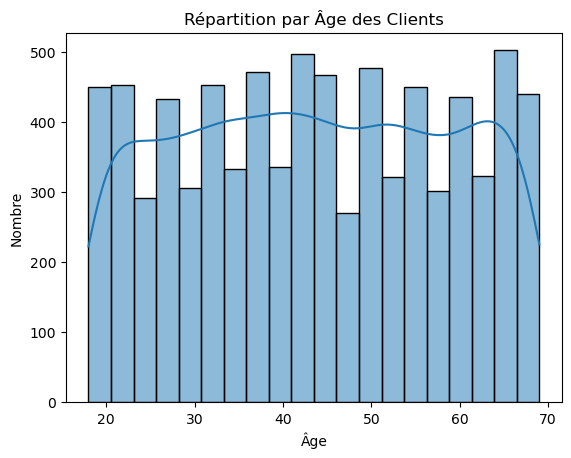

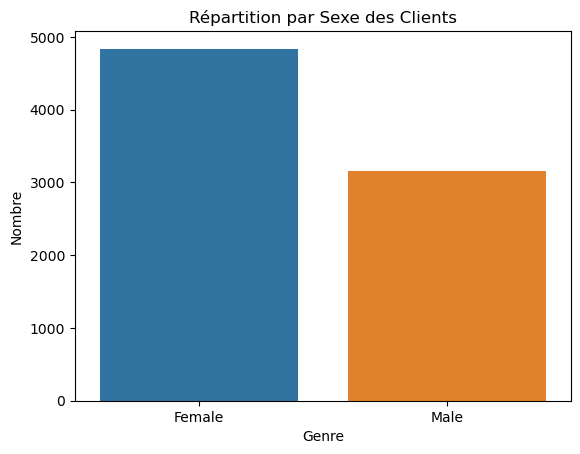

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


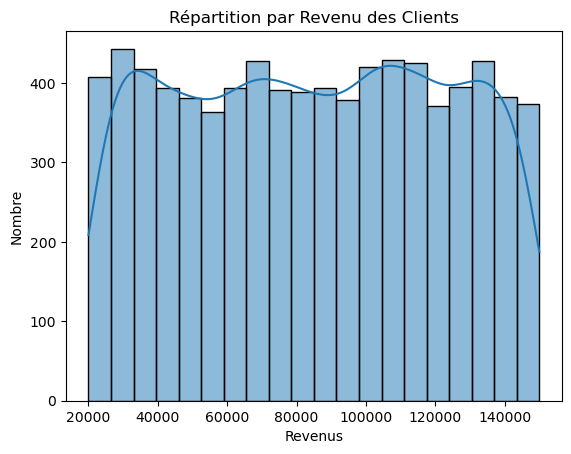

In [15]:
#  Visualize the distribution of customers by age, gender, and income. 

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True) 
plt.xlabel("Âge") 
plt.ylabel("Nombre") 
plt.title("Répartition par Âge des Clients") 
plt.show() 

# Gender distribution 
sns.countplot(x='Gender', data=df) 
plt.xlabel("Genre") 
plt.ylabel("Nombre") 
plt.title("Répartition par Sexe des Clients") 
plt.show() 

# Income distribution 
sns.histplot(df['Income'], bins=20, kde=True) 
plt.xlabel("Revenus") 
plt.ylabel("Nombre")
plt.title("Répartition par Revenu des Clients") 
plt.show()

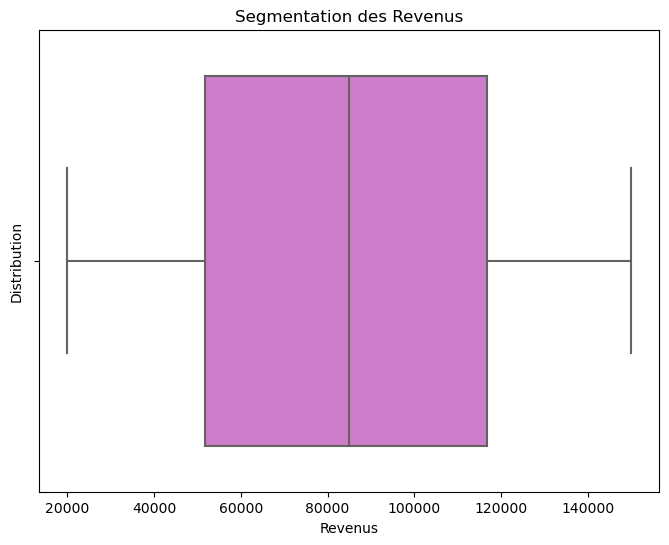

In [16]:
# To explore how income levels impact customer behavior, I will create a box plot. 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Income', data=df, color='Orchid') 
plt.xlabel("Revenus") 
plt.ylabel("Distribution") 
plt.title("Segmentation des Revenus") 
plt.show()

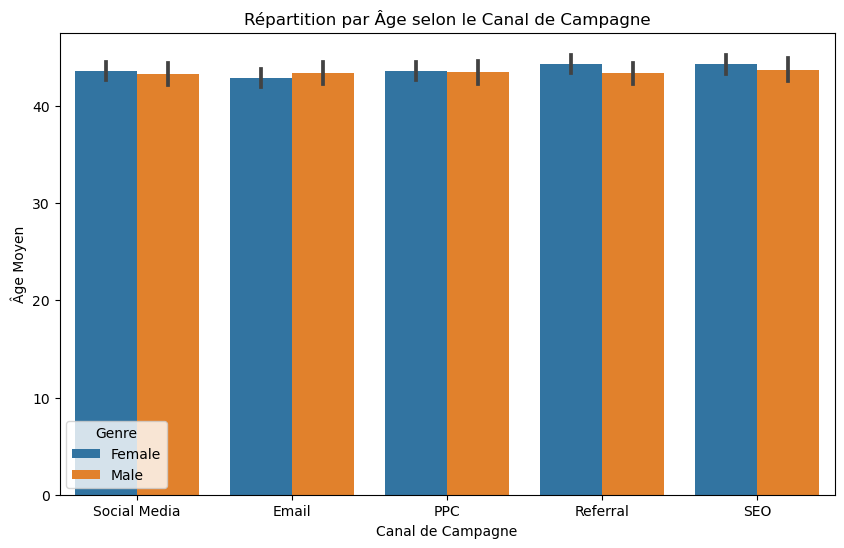

In [17]:
# To analyze customer demographics by campaign channel, I am creating a grouped bar plot. 
plt.figure(figsize=(10, 6)) 
sns.barplot(x='CampaignChannel', y='Age', hue='Gender', data=df) 
plt.xlabel("Canal de Campagne") 
plt.ylabel("Âge Moyen") 
plt.title("Répartition par Âge selon le Canal de Campagne") 
plt.legend(title="Genre") 
plt.show()

In [18]:
''' 
To monitor returning visitors, we can track the number of 
unique users who visit the website more than once. 
''' 
returning_visitors = len(df[df['WebsiteVisits']>1]) 
print(f"Nombre de Visiteurs Récurrents : {returning_visitors}") 

# Measure email opens, clicks, and conversions based on available data. 
avg_email_opens = df['EmailOpens'].mean() 
avg_email_clicks = df['EmailClicks'].mean() 
print(f"Moyenne d'ouvertures d'e-mails : {avg_email_opens: .2f}") 
print(f"Moyenne de clics sur e-mails : {avg_email_clicks: .2f}") 

# Understand repeat purchase behavior by analyzing how many times customers made purchases. 
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1]) 
print(f"Nombre d'achats répétés : {repeat_purchase_count}")

Nombre de Visiteurs Récurrents : 7700
Moyenne d'ouvertures d'e-mails :  9.48
Moyenne de clics sur e-mails :  4.47
Nombre d'achats répétés : 6368


In [19]:
''' Use a scatter plot to see the relationship between advertising spend and conversion rates. 
plt.figure(figsize=(8, 6)) 
plt.scatter(df['AdSpend'], df['ConversionRate'], color='b', alpha=0.5) 
plt.xlabel("Dépenses Publicitaires") 
plt.ylabel("Taux de Conversion") 
plt.title("Dépenses Publicitaires vs Taux de Conversion") 
plt.grid(True) 
plt.show() 
'''
# Filter the data to include only rows where Conversion is 0
conversion_zero_df = df[df['Conversion'] == 0]

# Group by CampaignChannel and sum the AdSpend for each category
channel_adspend = conversion_zero_df.groupby('CampaignChannel')['AdSpend'].sum()

# Display the results
print("AdSpend for each CampaignChannel where Conversion = 0:")
print(channel_adspend)

AdSpend for each CampaignChannel where Conversion = 0:
CampaignChannel
Email           863529.092179
PPC             764829.575777
Referral        841508.337088
SEO             748751.767959
Social Media    791078.911320
Name: AdSpend, dtype: float64


In [20]:
conversion_zero_df = df[df['Conversion'] == 0]

# Filter for the specific CampaignChannels (Social Media, Email, and SEO)
channels_of_interest = ['Social Media', 'Email', 'SEO']
filtered_df = conversion_zero_df[conversion_zero_df['CampaignChannel'].isin(channels_of_interest)]

# Group by CampaignChannel and CampaignType, and sum the AdSpend for each category
channel_campaign_type_adspend = filtered_df.groupby(['CampaignChannel', 'CampaignType'])['AdSpend'].sum()

# Display the results
print("AdSpend for Social Media, Email, and SEO by CampaignType (Conversion = 0):")
print(channel_campaign_type_adspend)

# Optional: Save the results to a CSV file
channel_campaign_type_adspend.to_csv('adspend_by_campaign_channel_campaign_type_conversion_zero.csv', header=['TotalAdSpend'])
print("\nResults saved to 'adspend_by_campaign_channel_campaign_type_conversion_zero.csv'")

AdSpend for Social Media, Email, and SEO by CampaignType (Conversion = 0):
CampaignChannel  CampaignType 
Email            Awareness        257198.632166
                 Consideration    223959.409851
                 Conversion       136010.493507
                 Retention        246360.556654
SEO              Awareness        247241.064418
                 Consideration    206171.584529
                 Conversion        94301.250967
                 Retention        201037.868045
Social Media     Awareness        251320.580152
                 Consideration    216918.142943
                 Conversion       111631.704524
                 Retention        211208.483701
Name: AdSpend, dtype: float64

Results saved to 'adspend_by_campaign_channel_campaign_type_conversion_zero.csv'


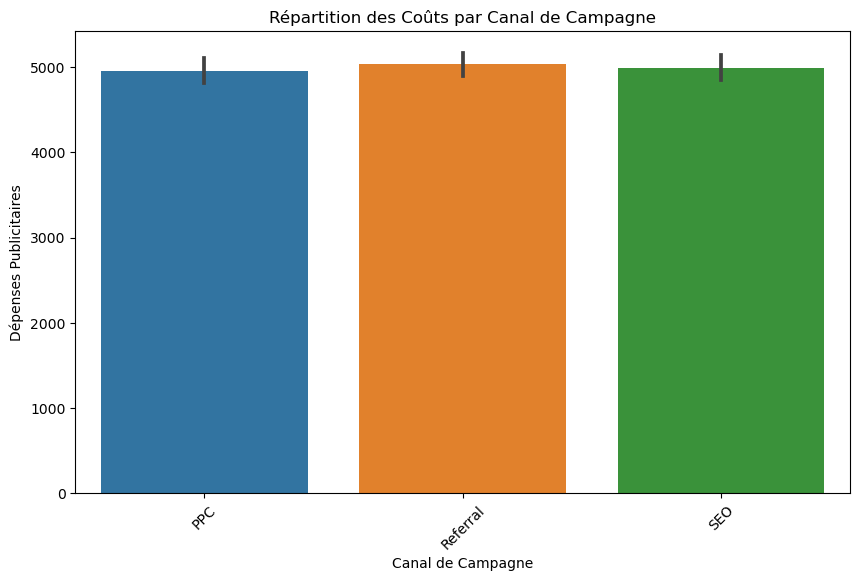

   CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0        8002   46  Female   88456             PPC      Awareness   
1        8003   32  Female   44085             PPC     Conversion   
2        8004   60  Female   83964             PPC     Conversion   
3        8006   38  Female   25615        Referral      Awareness   
4        8010   28    Male   88319             PPC      Retention   
5        8011   28    Male   29605             SEO      Awareness   
6        8013   53    Male   64608             SEO      Awareness   
7        8016   20  Female   23331             PPC     Conversion   
8        8018   19  Female  117392             PPC     Conversion   
9        8019   41  Female   69949             PPC  Consideration   

       AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0  1546.429596          0.277490        0.076423              2   
1   539.525936          0.137611        0.088004             47   
2  1678.043573          0.252851       

In [25]:
''' 
We need to cut emails and social media (awareness campaign types) 
because we are spending too much money on them and they have the least 
conversions.  
''' 

plt.figure(figsize=(10, 6)) 
sns.barplot(x='CampaignChannel', y='AdSpend', data=df) 
plt.xlabel("Canal de Campagne") 
plt.ylabel("Dépenses Publicitaires") 
plt.title("Répartition des Coûts par Canal de Campagne") 
plt.xticks(rotation=45) 
plt.show() 

# We can cut budget in all areas, and the company can save money because money doesn't change the outcome. 

# Remove rows where column 'Name' contains 'John'
df = df[~df['CampaignChannel'].isin(['Email', 'Social Media'])]

# Save the cleaned data
df.to_excel("new_campaign.xlsx", index=False) 
file_path = "new_campaign.xlsx"
df = pd.read_excel(file_path)

# Display the first 10 rows
print(df.head(10))

In [26]:
total_cost = df['AdSpend'].sum() 
total_customers = len(df[df['Conversion']==1]) 
cpa = total_cost / total_customers 
print(f"Cost per Acquisition (CPA) : ${cpa:.2f}") 
print(f"${total_cost:.2f}")

Cost per Acquisition (CPA) : $5669.35
$24593659.54


In [30]:
conversion_rate = df['Conversion'].sum() / len(df) * 100 
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 88.10%


In [ ]:
''' 
Cost per Acquisition (CPA) : $5705.58
$40007558.64
Result of eliminating emails and social media from the campaign : 
The CPA had decreased by $36,23. leading to a 38,53% decrease in spending. 
The conversion rate increased by 0,45%.  
''' 